In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
rc('font', **{'family': 'serif', 'serif': ['Cambria', 'Times New Roman']})

import seaborn as sns

In [2]:
%load_ext watermark

In [3]:
%watermark -h -v -m -p pandas,numpy,matplotlib

CPython 3.6.0
IPython 5.1.0

pandas 0.19.2
numpy 1.11.3
matplotlib 2.0.0

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 42 Stepping 7, GenuineIntel
CPU cores  : 8
interpreter: 64bit
host name  : user-PC


In [4]:
pd.options.display.max_rows = 10

In [5]:
h5root = '..\\h5 files\\'
chartdir = 'C:\\Users\\user\\Documents\\Agent-Based Models\\Charts\\'

In [17]:
h5subdir = 'Trial 102\\'
h5file = 'smallcap_%d.h5' % 31

In [18]:
h5in = '%s%s%s' % (h5root, h5subdir, h5file)

In [19]:
buys = 0
sells = 0
for j in range(1,101):
    h5file = 'smallcap_%d.h5' % j
    h5in = '%s%s%s' % (h5root, h5subdir, h5file)
    indf = pd.read_hdf(h5in, 'trades')
    buys += indf.groupby('side').quantity.sum().loc['buy']
    sells += indf.groupby('side').quantity.sum().loc['sell']
buys, sells

(1701573, 1700461)

## Use all trades

In [20]:
indf = pd.read_hdf(h5in, 'trades')
indf.price.describe()

count    6.228900e+04
mean     1.000253e+06
std      6.705834e+01
min      1.000098e+06
25%      1.000198e+06
50%      1.000250e+06
75%      1.000303e+06
max      1.000446e+06
Name: price, dtype: float64

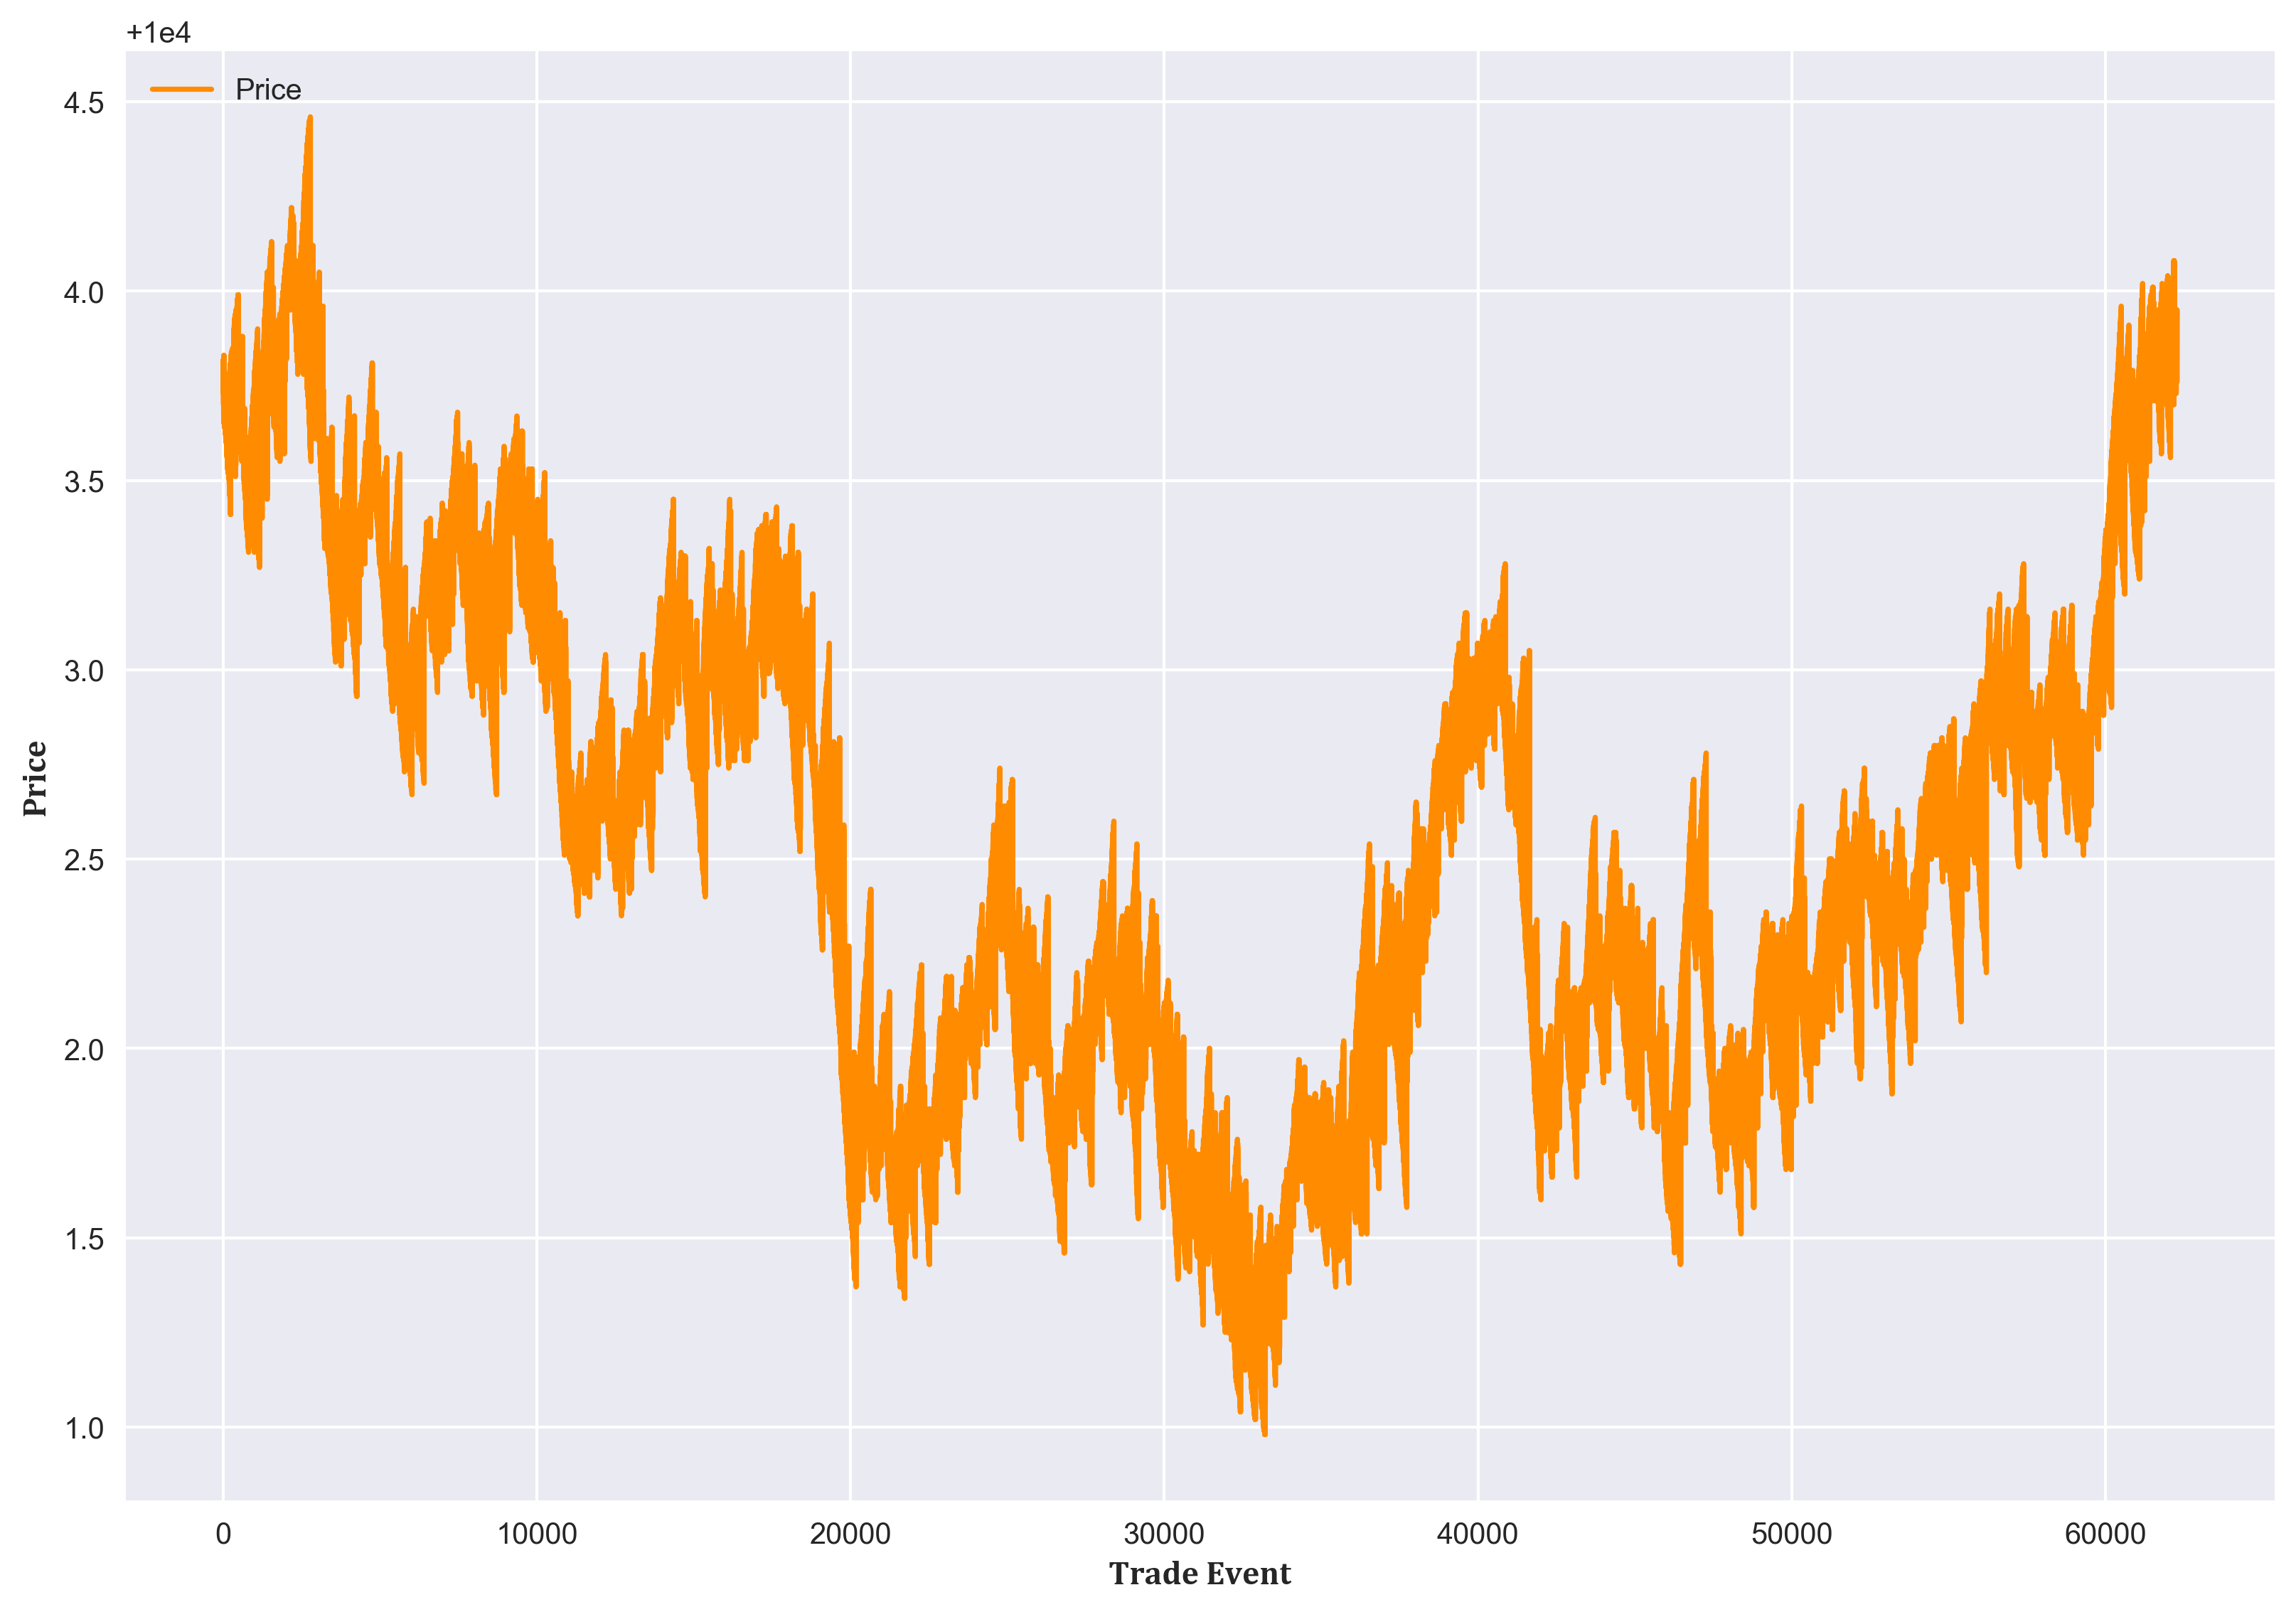

In [21]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.plot(indf.price/100, linestyle='solid', color='DarkOrange', marker='None', label='Price')
ax1.set_xlabel('Trade Event', family='Cambria')
ax1.set_ylabel('Price', family='Cambria')
ax1.legend(loc='upper left')
fig.savefig('%sret102.png' % chartdir)
plt.show()

In [11]:
indf = indf.assign(ret = 100*indf.price.pct_change())
indf = indf.assign(abs_ret = np.abs(indf.ret))
indf

,incoming_order_id,price,quantity,resting_order_id,resting_timestamp,side,timestamp,ret,abs_ret
0,t4_1,1000375,1,p999999_a,0,buy,20,NaN,NaN
1,t26_1,1000374,1,p6_2,12,sell,24,-0.0001,0.0001
2,t4_2,1000379,1,p43_1,10,buy,30,0.0005,0.0005
3,t29_1,1000380,1,m0_13,21,buy,31,0.0001,0.0001
4,t26_2,1000380,1,m0_97,28,buy,36,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...
31251,t6_45,1000360,1,m0_1199414,99971,buy,99990,0.0001,0.0001
31252,t47_173,1000361,1,m0_1198949,99932,buy,99994,0.0001,0.0001
31253,t26_8332,1000349,1,m0_1199436,99972,sell,99996,-0.0012,0.0012
31254,t19_156,1000361,1,m0_1199036,99939,buy,99996,0.0012,0.0012


### Autocorrelation

In [12]:
lags = []
autocorr = []
abs_autocorr = []
for i in range(1,51):
    ac = indf.ret.autocorr(lag = i)
    aac = indf.abs_ret.autocorr(lag = i)
    lags.append(i)
    autocorr.append(ac)
    abs_autocorr.append(aac)

ar_df = pd.DataFrame({'lag': lags, 'autocorrelation': autocorr, 'autocorrelation_abs': abs_autocorr})
ar_df.set_index('lag', inplace=True)
clustering_constant = ar_df.autocorrelation_abs.sum()/ar_df.autocorrelation.sum()
np.abs(clustering_constant)

11.307467519925792

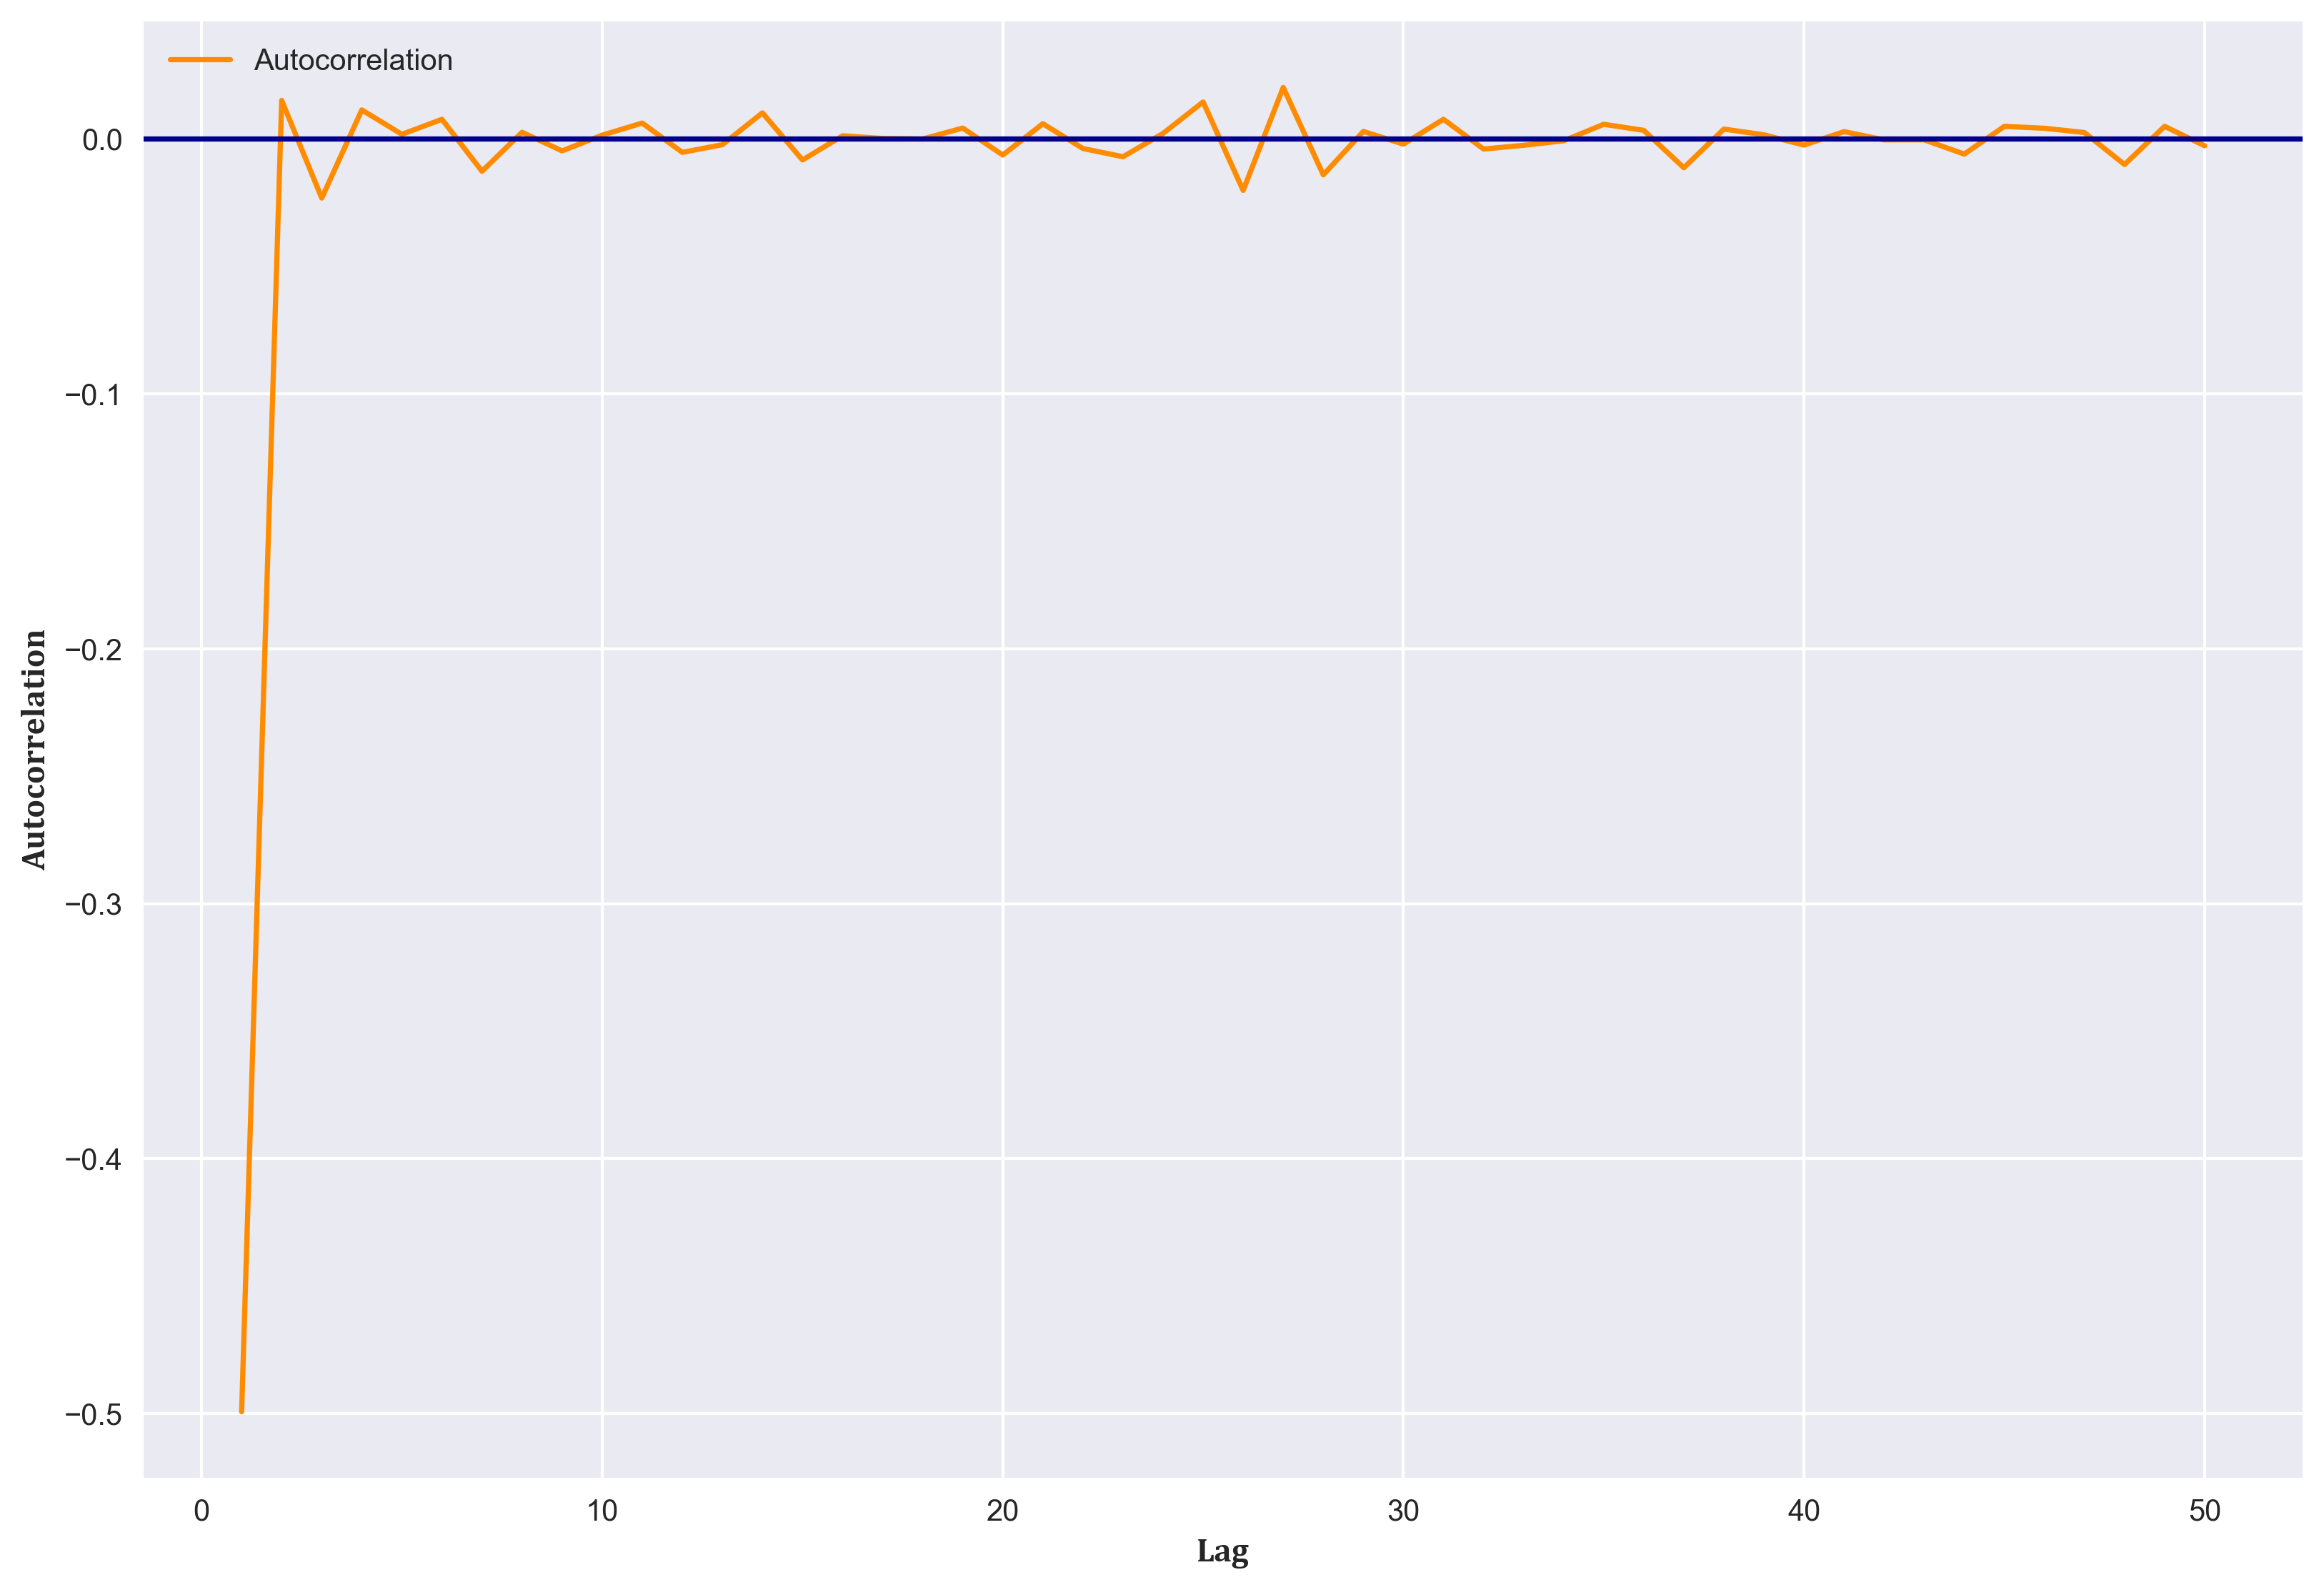

In [13]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.plot(ar_df['autocorrelation'], linestyle='solid', color='DarkOrange', marker='None', label='Autocorrelation')
ax1.axhline(y=0, linestyle='solid', color='DarkBlue', marker='None')
ax1.set_xlabel('Lag', family='Cambria')
ax1.set_ylabel('Autocorrelation', family='Cambria')
ax1.legend(loc='upper left')
fig.savefig('%sac1.png' % chartdir)
plt.show()

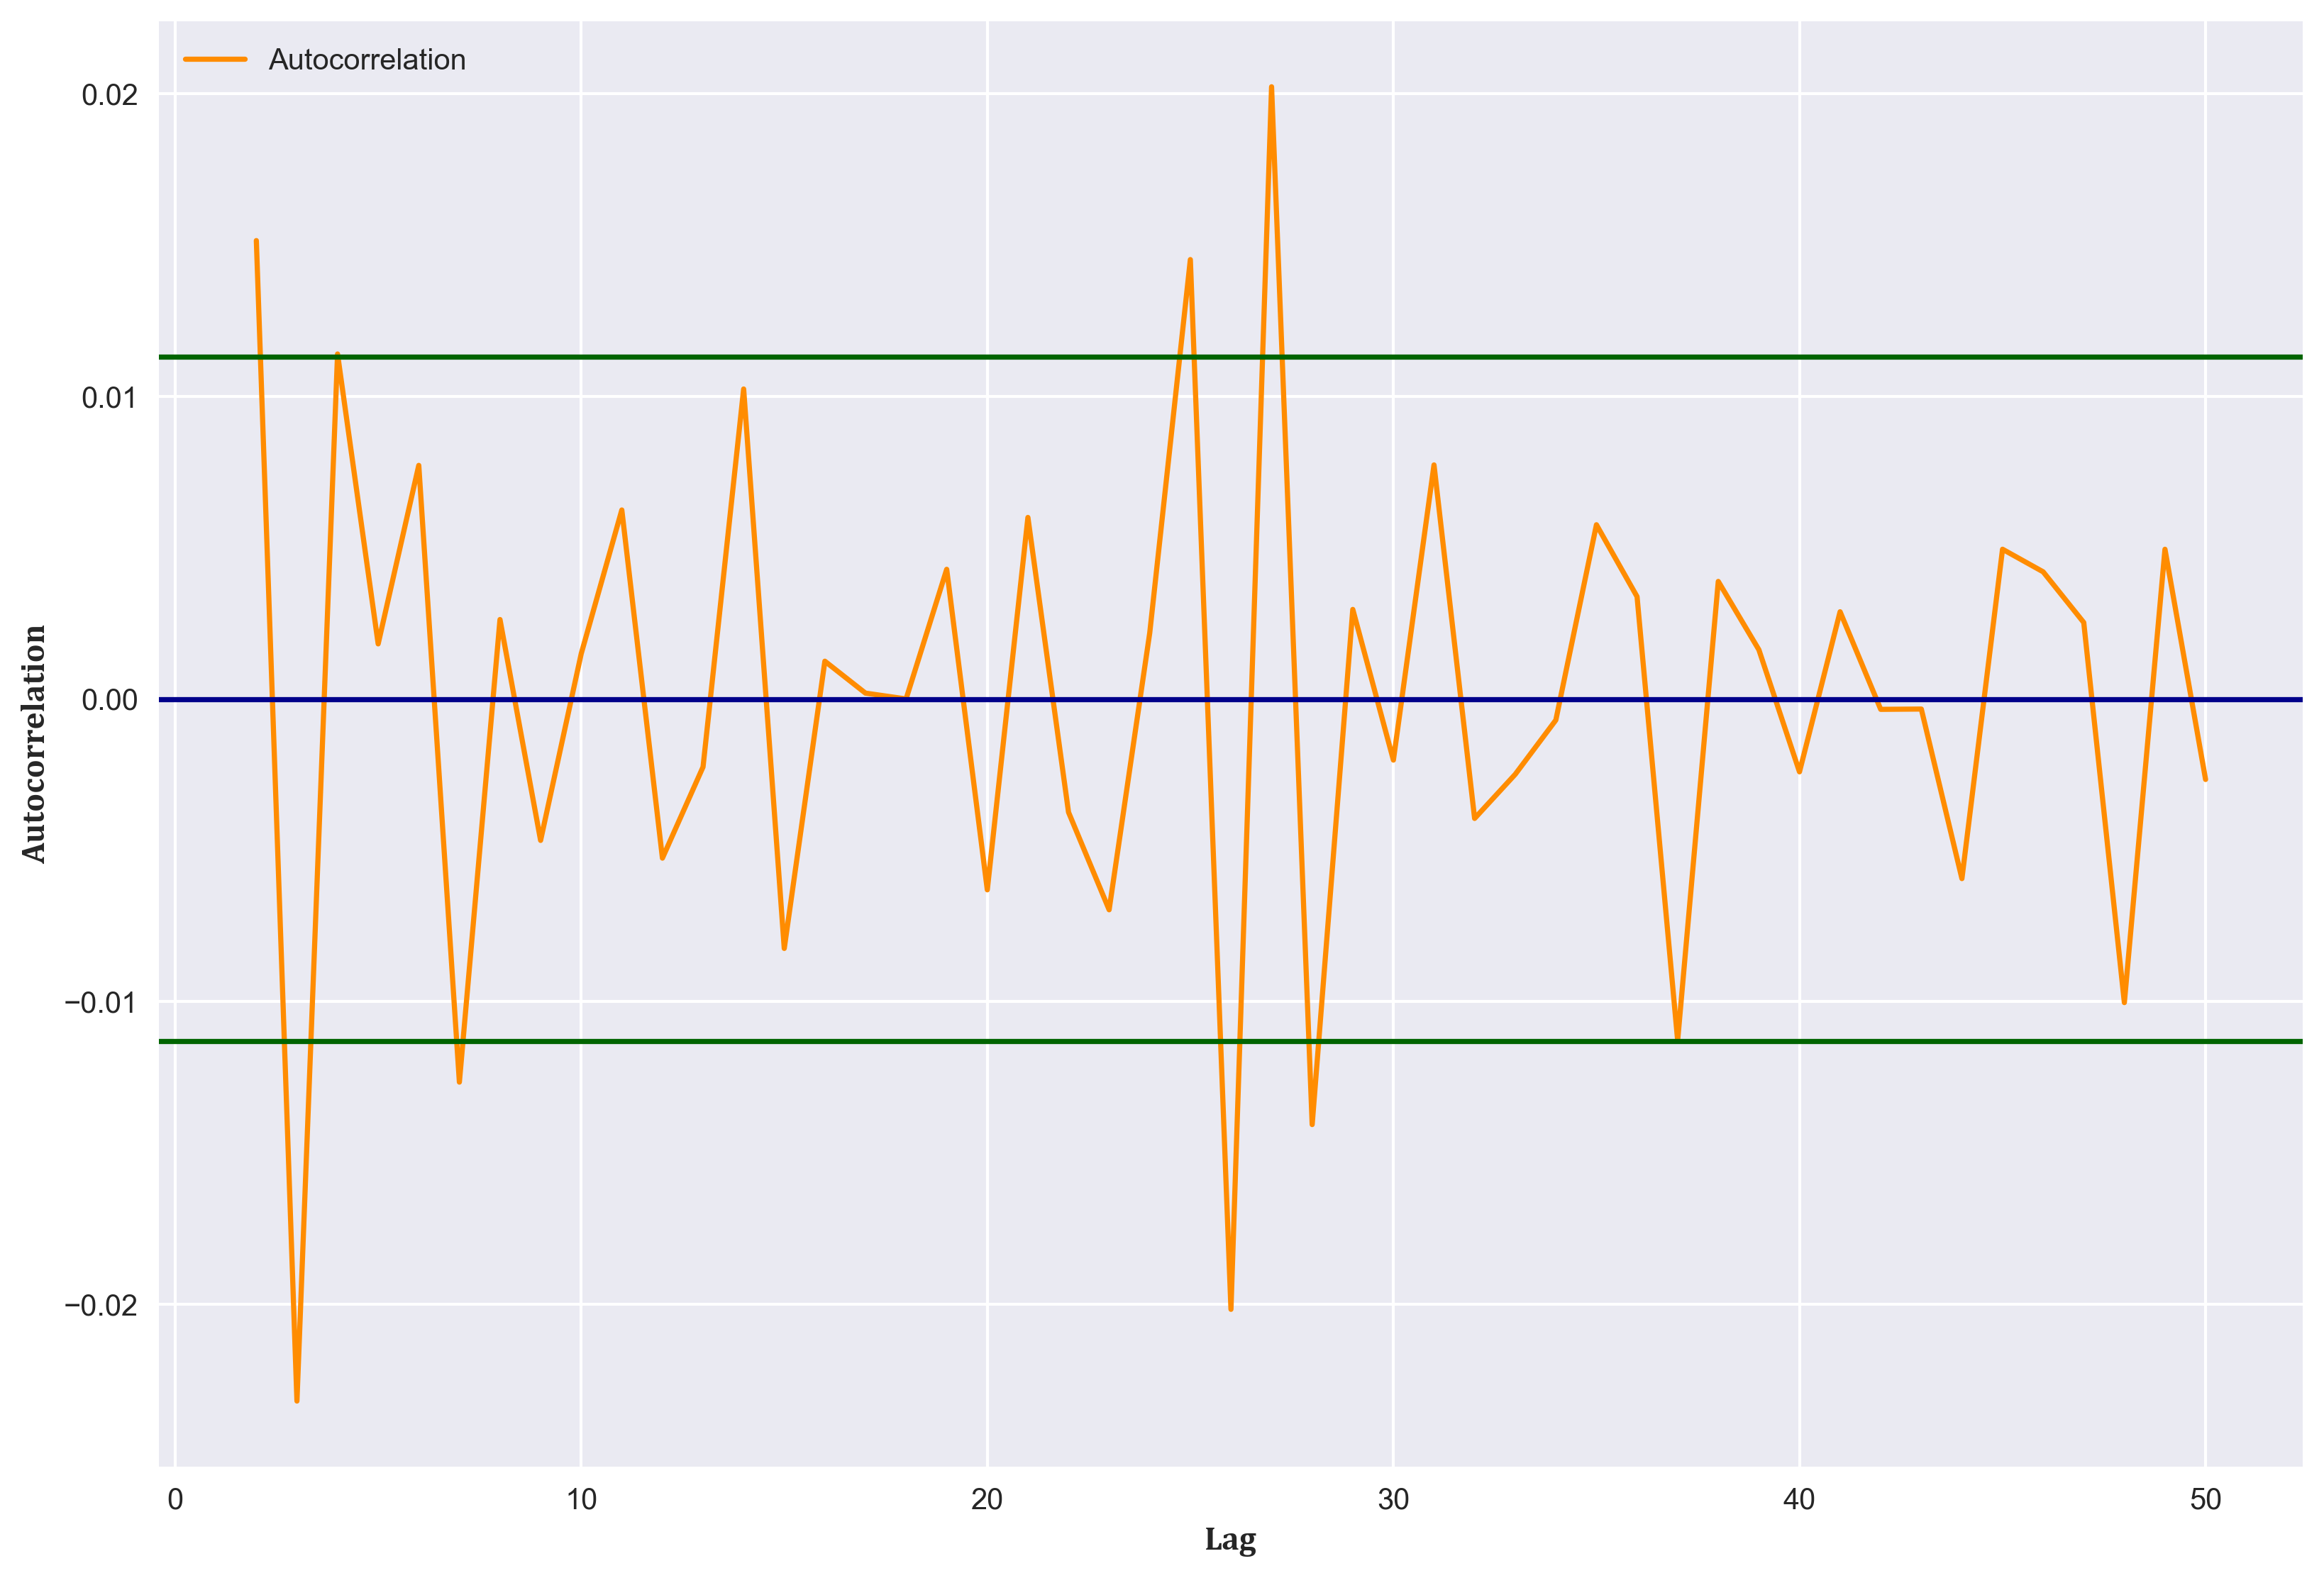

In [14]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.plot(ar_df.loc[2:]['autocorrelation'], linestyle='solid', color='DarkOrange', marker='None', label='Autocorrelation')
ax1.axhline(y=0, linestyle='solid', color='DarkBlue', marker='None')
ax1.axhline(y=2/np.sqrt(indf.ret.count()), linestyle='solid', color='DarkGreen', marker='None')
ax1.axhline(y=-2/np.sqrt(indf.ret.count()), linestyle='solid', color='DarkGreen', marker='None')
ax1.set_xlabel('Lag', family='Cambria')
ax1.set_ylabel('Autocorrelation', family='Cambria')
ax1.legend(loc='upper left')
fig.savefig('%sac2.png' % chartdir)
plt.show()

In [15]:
indf.ret.mean(), indf.ret.std(), indf.ret.kurtosis(), indf.ret.skew()

(-3.728599819554363e-08,
 0.0012239768757905895,
 1.6690676833782607,
 0.00033095013351310042)

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


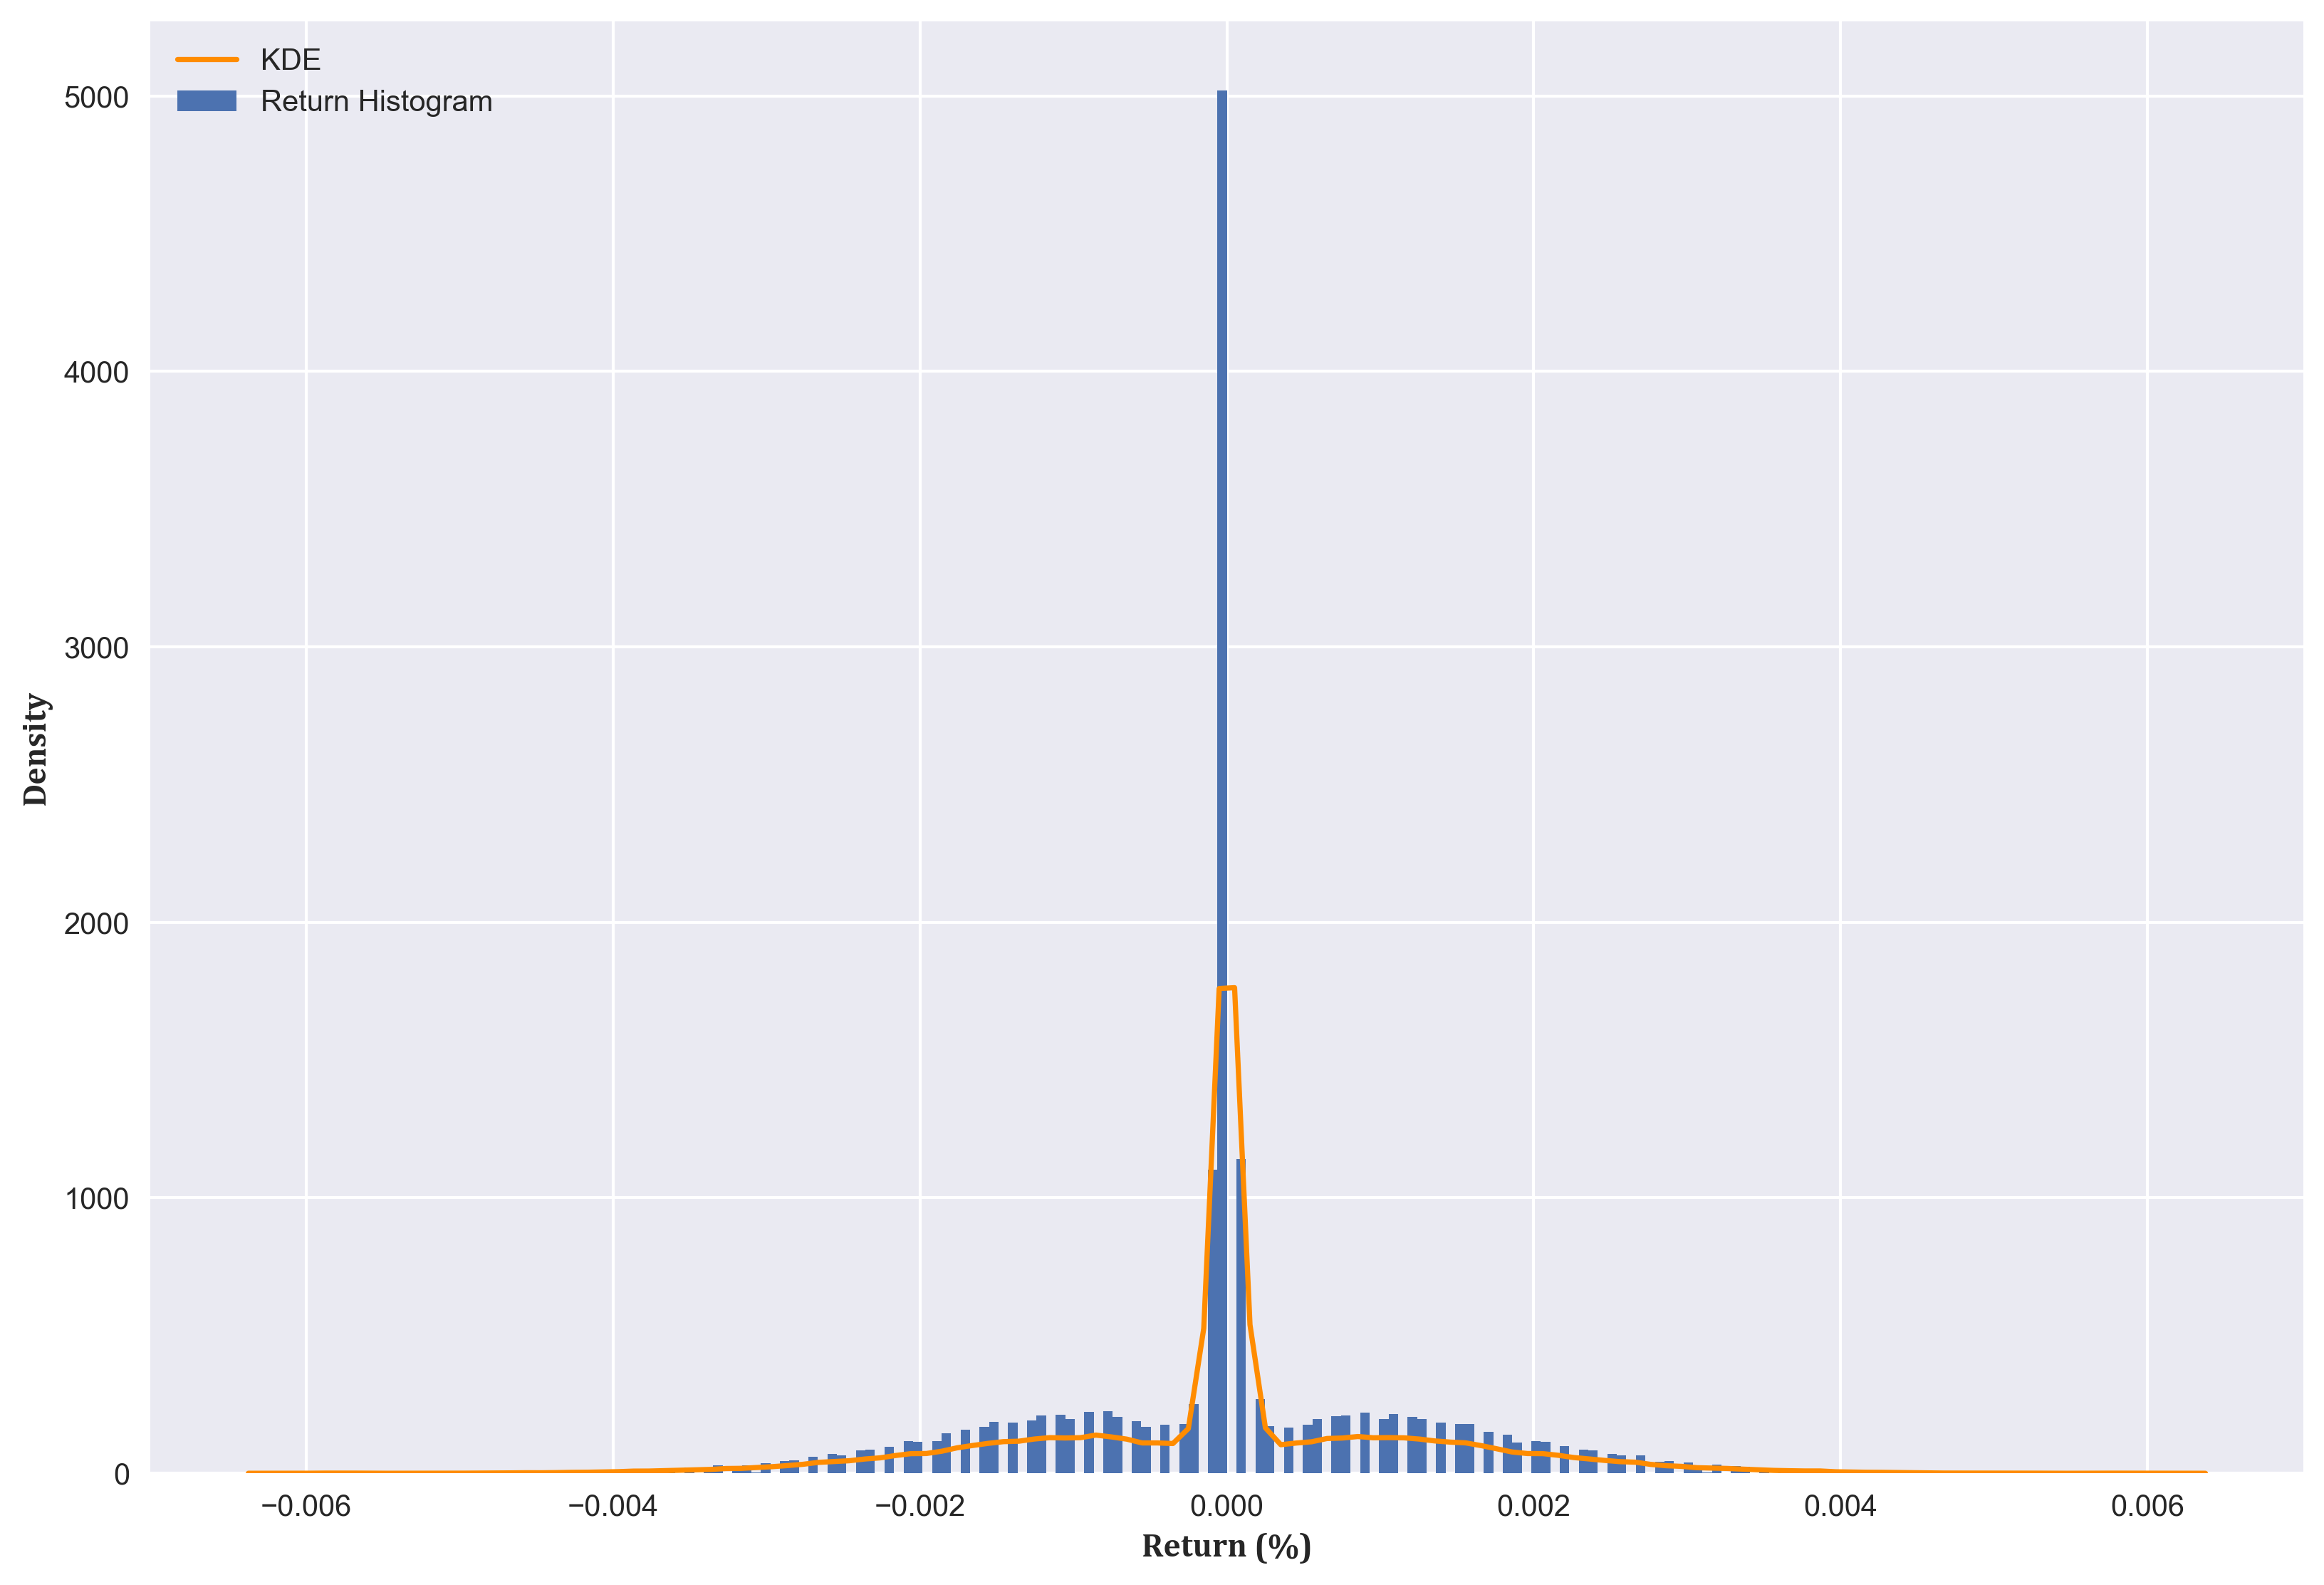

In [16]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.hist(indf.ret[1:], bins=200, normed=True, label='Return Histogram')
sns.kdeplot(indf.ret[1:], ax=ax1, linestyle='solid', marker='None', color='DarkOrange', label='KDE')
ax1.set_xlabel('Return (%)', family='Cambria')
ax1.set_ylabel('Density', family='Cambria')
ax1.legend(loc='upper left')
fig.savefig('%sretdist.png' % chartdir)
plt.show()

In [17]:
indf = indf.assign(ScaledPrice = indf.price/100 - 9950)
indf

,incoming_order_id,price,quantity,resting_order_id,resting_timestamp,side,timestamp,ret,abs_ret,ScaledPrice
0,t4_1,1000375,1,p999999_a,0,buy,20,NaN,NaN,53.75
1,t26_1,1000374,1,p6_2,12,sell,24,-0.0001,0.0001,53.74
2,t4_2,1000379,1,p43_1,10,buy,30,0.0005,0.0005,53.79
3,t29_1,1000374,1,m0_39,27,sell,31,-0.0005,0.0005,53.74
4,t26_2,1000380,1,m0_3,20,buy,36,0.0006,0.0006,53.80
...,...,...,...,...,...,...,...,...,...,...
31251,t6_45,1000483,1,m0_499759,99971,buy,99990,0.0009,0.0009,54.83
31252,t47_173,1000474,1,m0_499637,99947,sell,99994,-0.0009,0.0009,54.74
31253,t19_156,1000483,1,m0_499789,99977,buy,99996,0.0009,0.0009,54.83
31254,t26_8332,1000483,1,m0_499797,99979,buy,99996,0.0000,0.0000,54.83


In [18]:
indf = indf.assign(ret1 = 100*indf.ScaledPrice.pct_change())
indf = indf.assign(abs_ret1 = np.abs(indf.ScaledPrice))
indf

,incoming_order_id,price,quantity,resting_order_id,resting_timestamp,side,timestamp,ret,abs_ret,ScaledPrice,ret1,abs_ret1
0,t4_1,1000375,1,p999999_a,0,buy,20,NaN,NaN,53.75,NaN,53.75
1,t26_1,1000374,1,p6_2,12,sell,24,-0.0001,0.0001,53.74,-0.018605,53.74
2,t4_2,1000379,1,p43_1,10,buy,30,0.0005,0.0005,53.79,0.093041,53.79
3,t29_1,1000374,1,m0_39,27,sell,31,-0.0005,0.0005,53.74,-0.092954,53.74
4,t26_2,1000380,1,m0_3,20,buy,36,0.0006,0.0006,53.80,0.111649,53.80
...,...,...,...,...,...,...,...,...,...,...,...,...
31251,t6_45,1000483,1,m0_499759,99971,buy,99990,0.0009,0.0009,54.83,0.164414,54.83
31252,t47_173,1000474,1,m0_499637,99947,sell,99994,-0.0009,0.0009,54.74,-0.164144,54.74
31253,t19_156,1000483,1,m0_499789,99977,buy,99996,0.0009,0.0009,54.83,0.164414,54.83
31254,t26_8332,1000483,1,m0_499797,99979,buy,99996,0.0000,0.0000,54.83,0.000000,54.83


In [19]:
lags = []
autocorr = []
abs_autocorr = []
for i in range(1,51):
    ac = indf.ret1.autocorr(lag = i)
    aac = indf.abs_ret1.autocorr(lag = i)
    lags.append(i)
    autocorr.append(ac)
    abs_autocorr.append(aac)

ar_df = pd.DataFrame({'lag': lags, 'autocorrelation': autocorr, 'autocorrelation_abs': abs_autocorr})
ar_df.set_index('lag', inplace=True)
clustering_constant = ar_df.autocorrelation_abs.sum()/ar_df.autocorrelation.sum()
np.abs(clustering_constant)

100.73390339695312

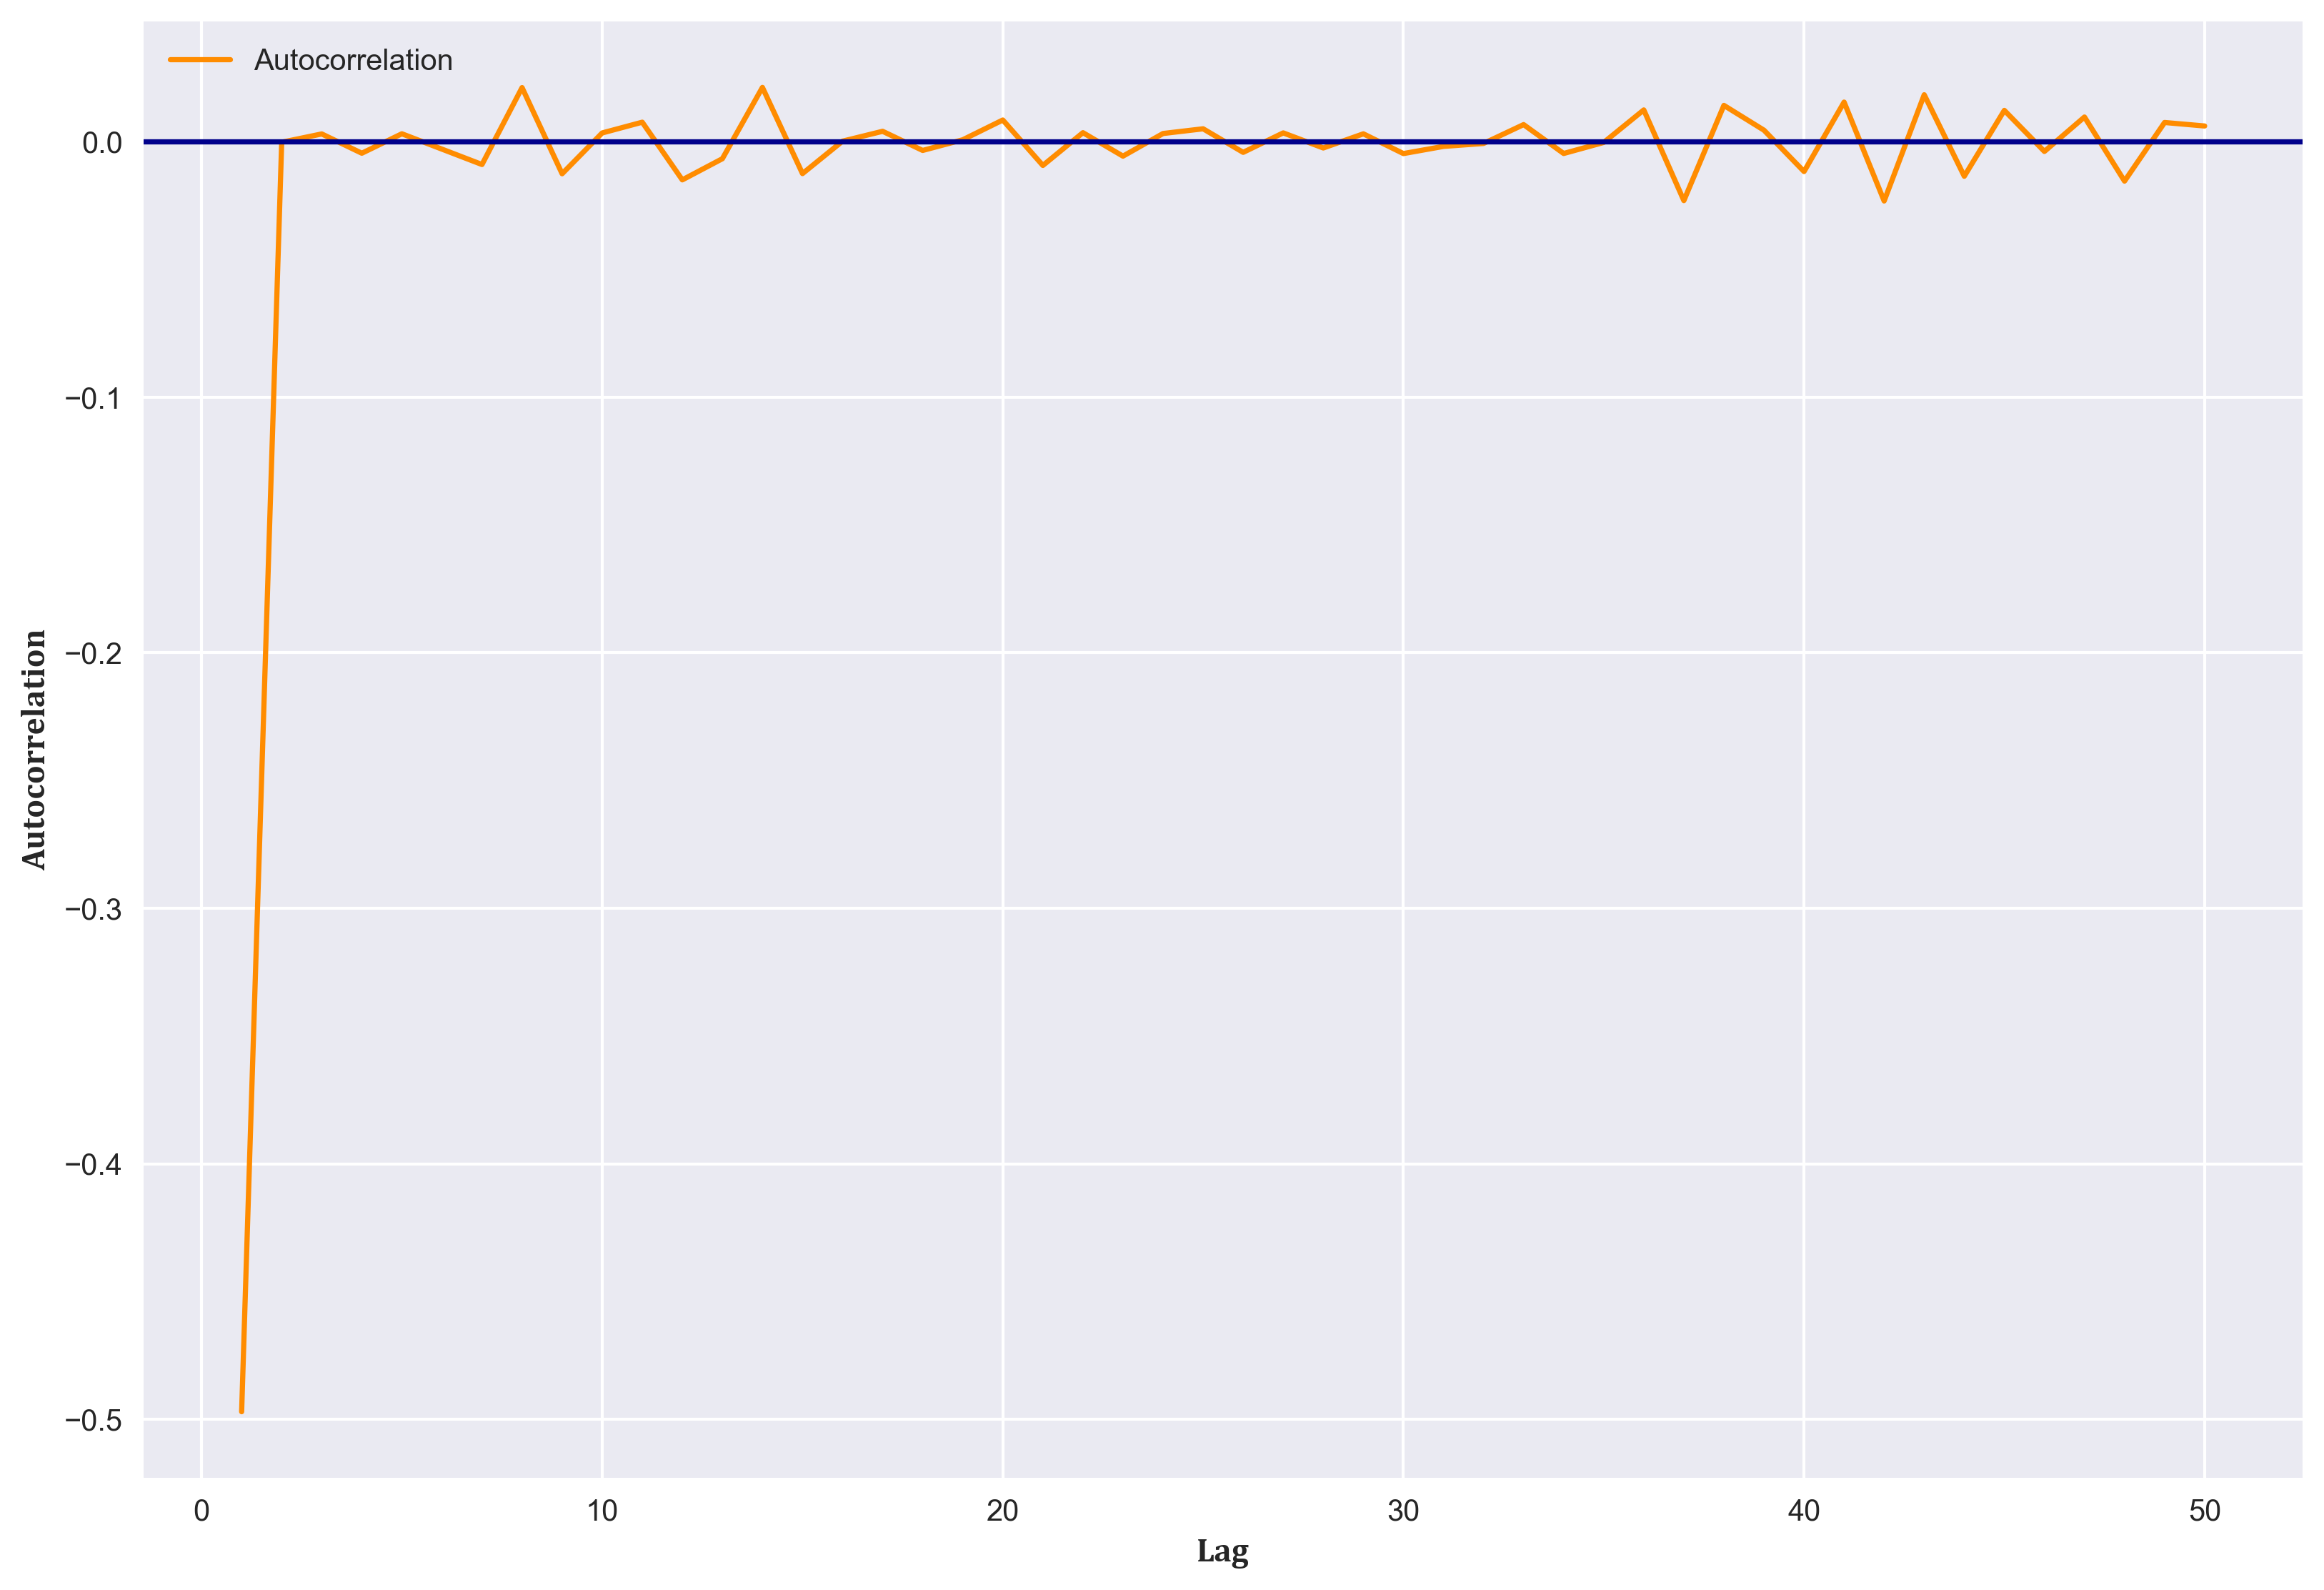

In [20]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.plot(ar_df['autocorrelation'], linestyle='solid', color='DarkOrange', marker='None', label='Autocorrelation')
ax1.axhline(y=0, linestyle='solid', color='DarkBlue', marker='None')
ax1.set_xlabel('Lag', family='Cambria')
ax1.set_ylabel('Autocorrelation', family='Cambria')
ax1.legend(loc='upper left')
fig.savefig('%sac1.png' % chartdir)
plt.show()

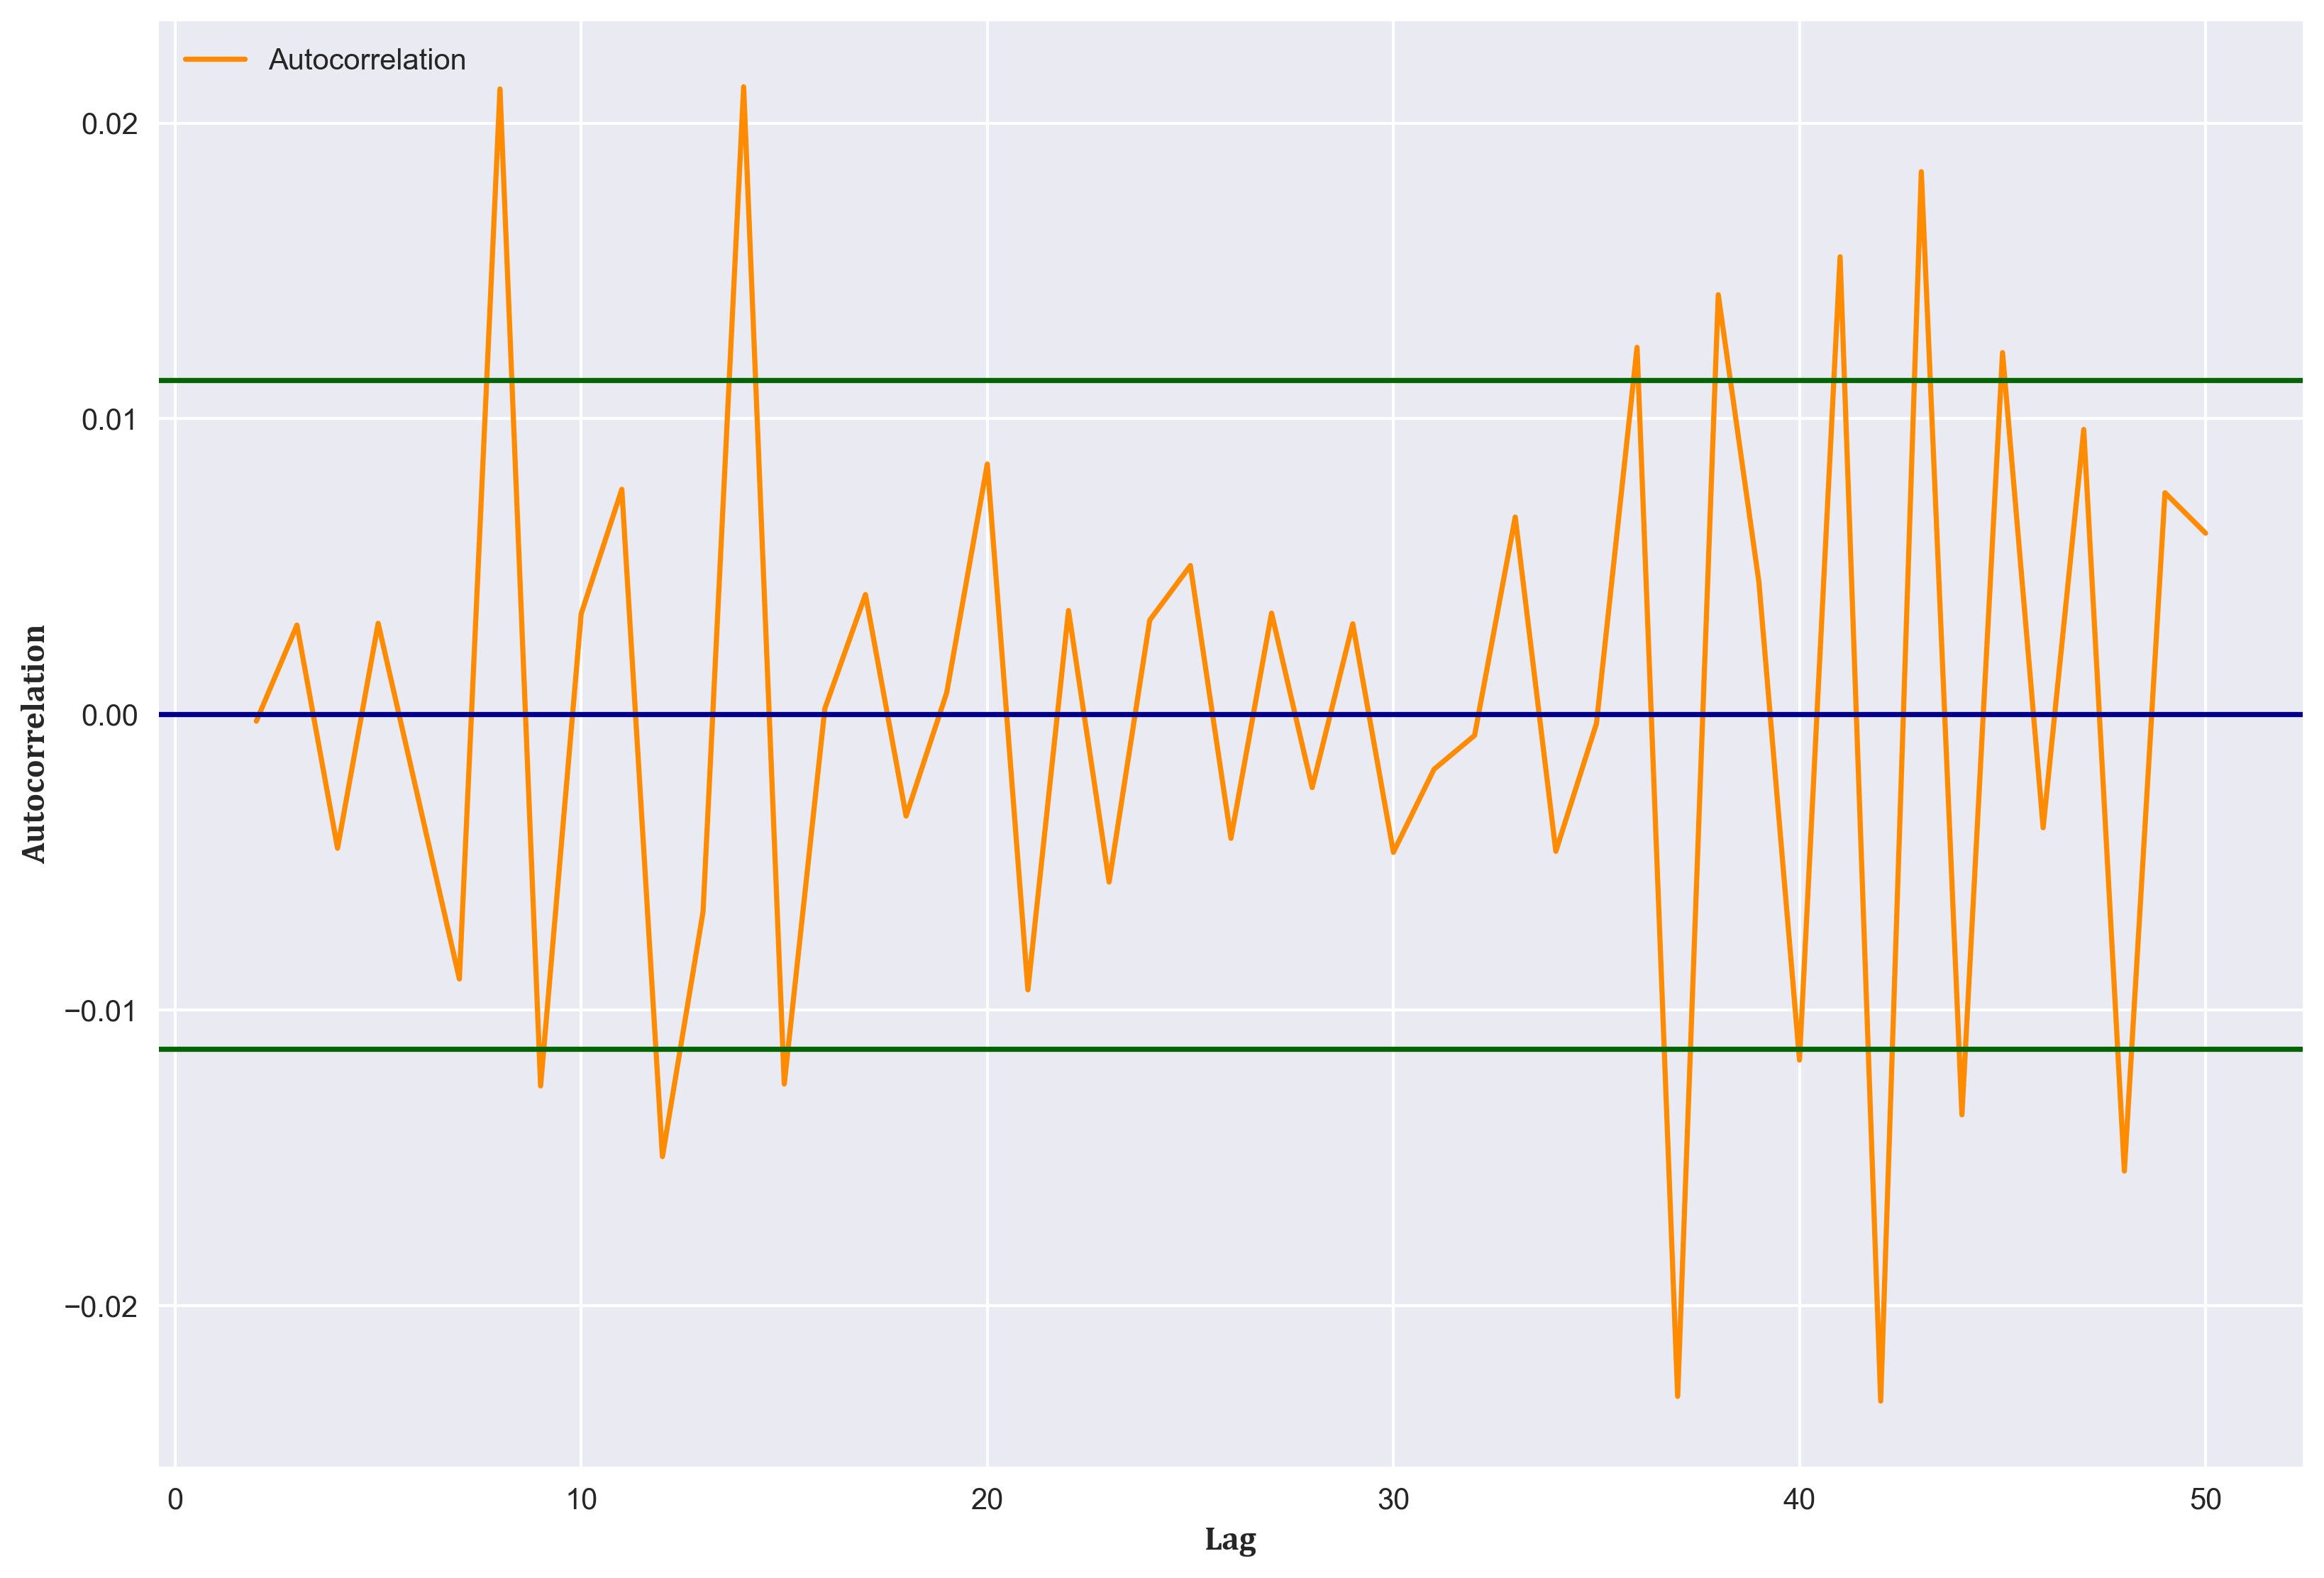

In [21]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.plot(ar_df.loc[2:]['autocorrelation'], linestyle='solid', color='DarkOrange', marker='None', label='Autocorrelation')
ax1.axhline(y=0, linestyle='solid', color='DarkBlue', marker='None')
ax1.axhline(y=2/np.sqrt(indf.ret.count()), linestyle='solid', color='DarkGreen', marker='None')
ax1.axhline(y=-2/np.sqrt(indf.ret.count()), linestyle='solid', color='DarkGreen', marker='None')
ax1.set_xlabel('Lag', family='Cambria')
ax1.set_ylabel('Autocorrelation', family='Cambria')
ax1.legend(loc='upper left')
fig.savefig('%sac2.png' % chartdir)
plt.show()

In [22]:
indf.ret1.mean(), indf.ret1.std(), indf.ret1.kurtosis(), indf.ret1.skew()

(0.000255253322986572,
 0.19546191416921252,
 1.7954316242576072,
 0.0079870995955736122)

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


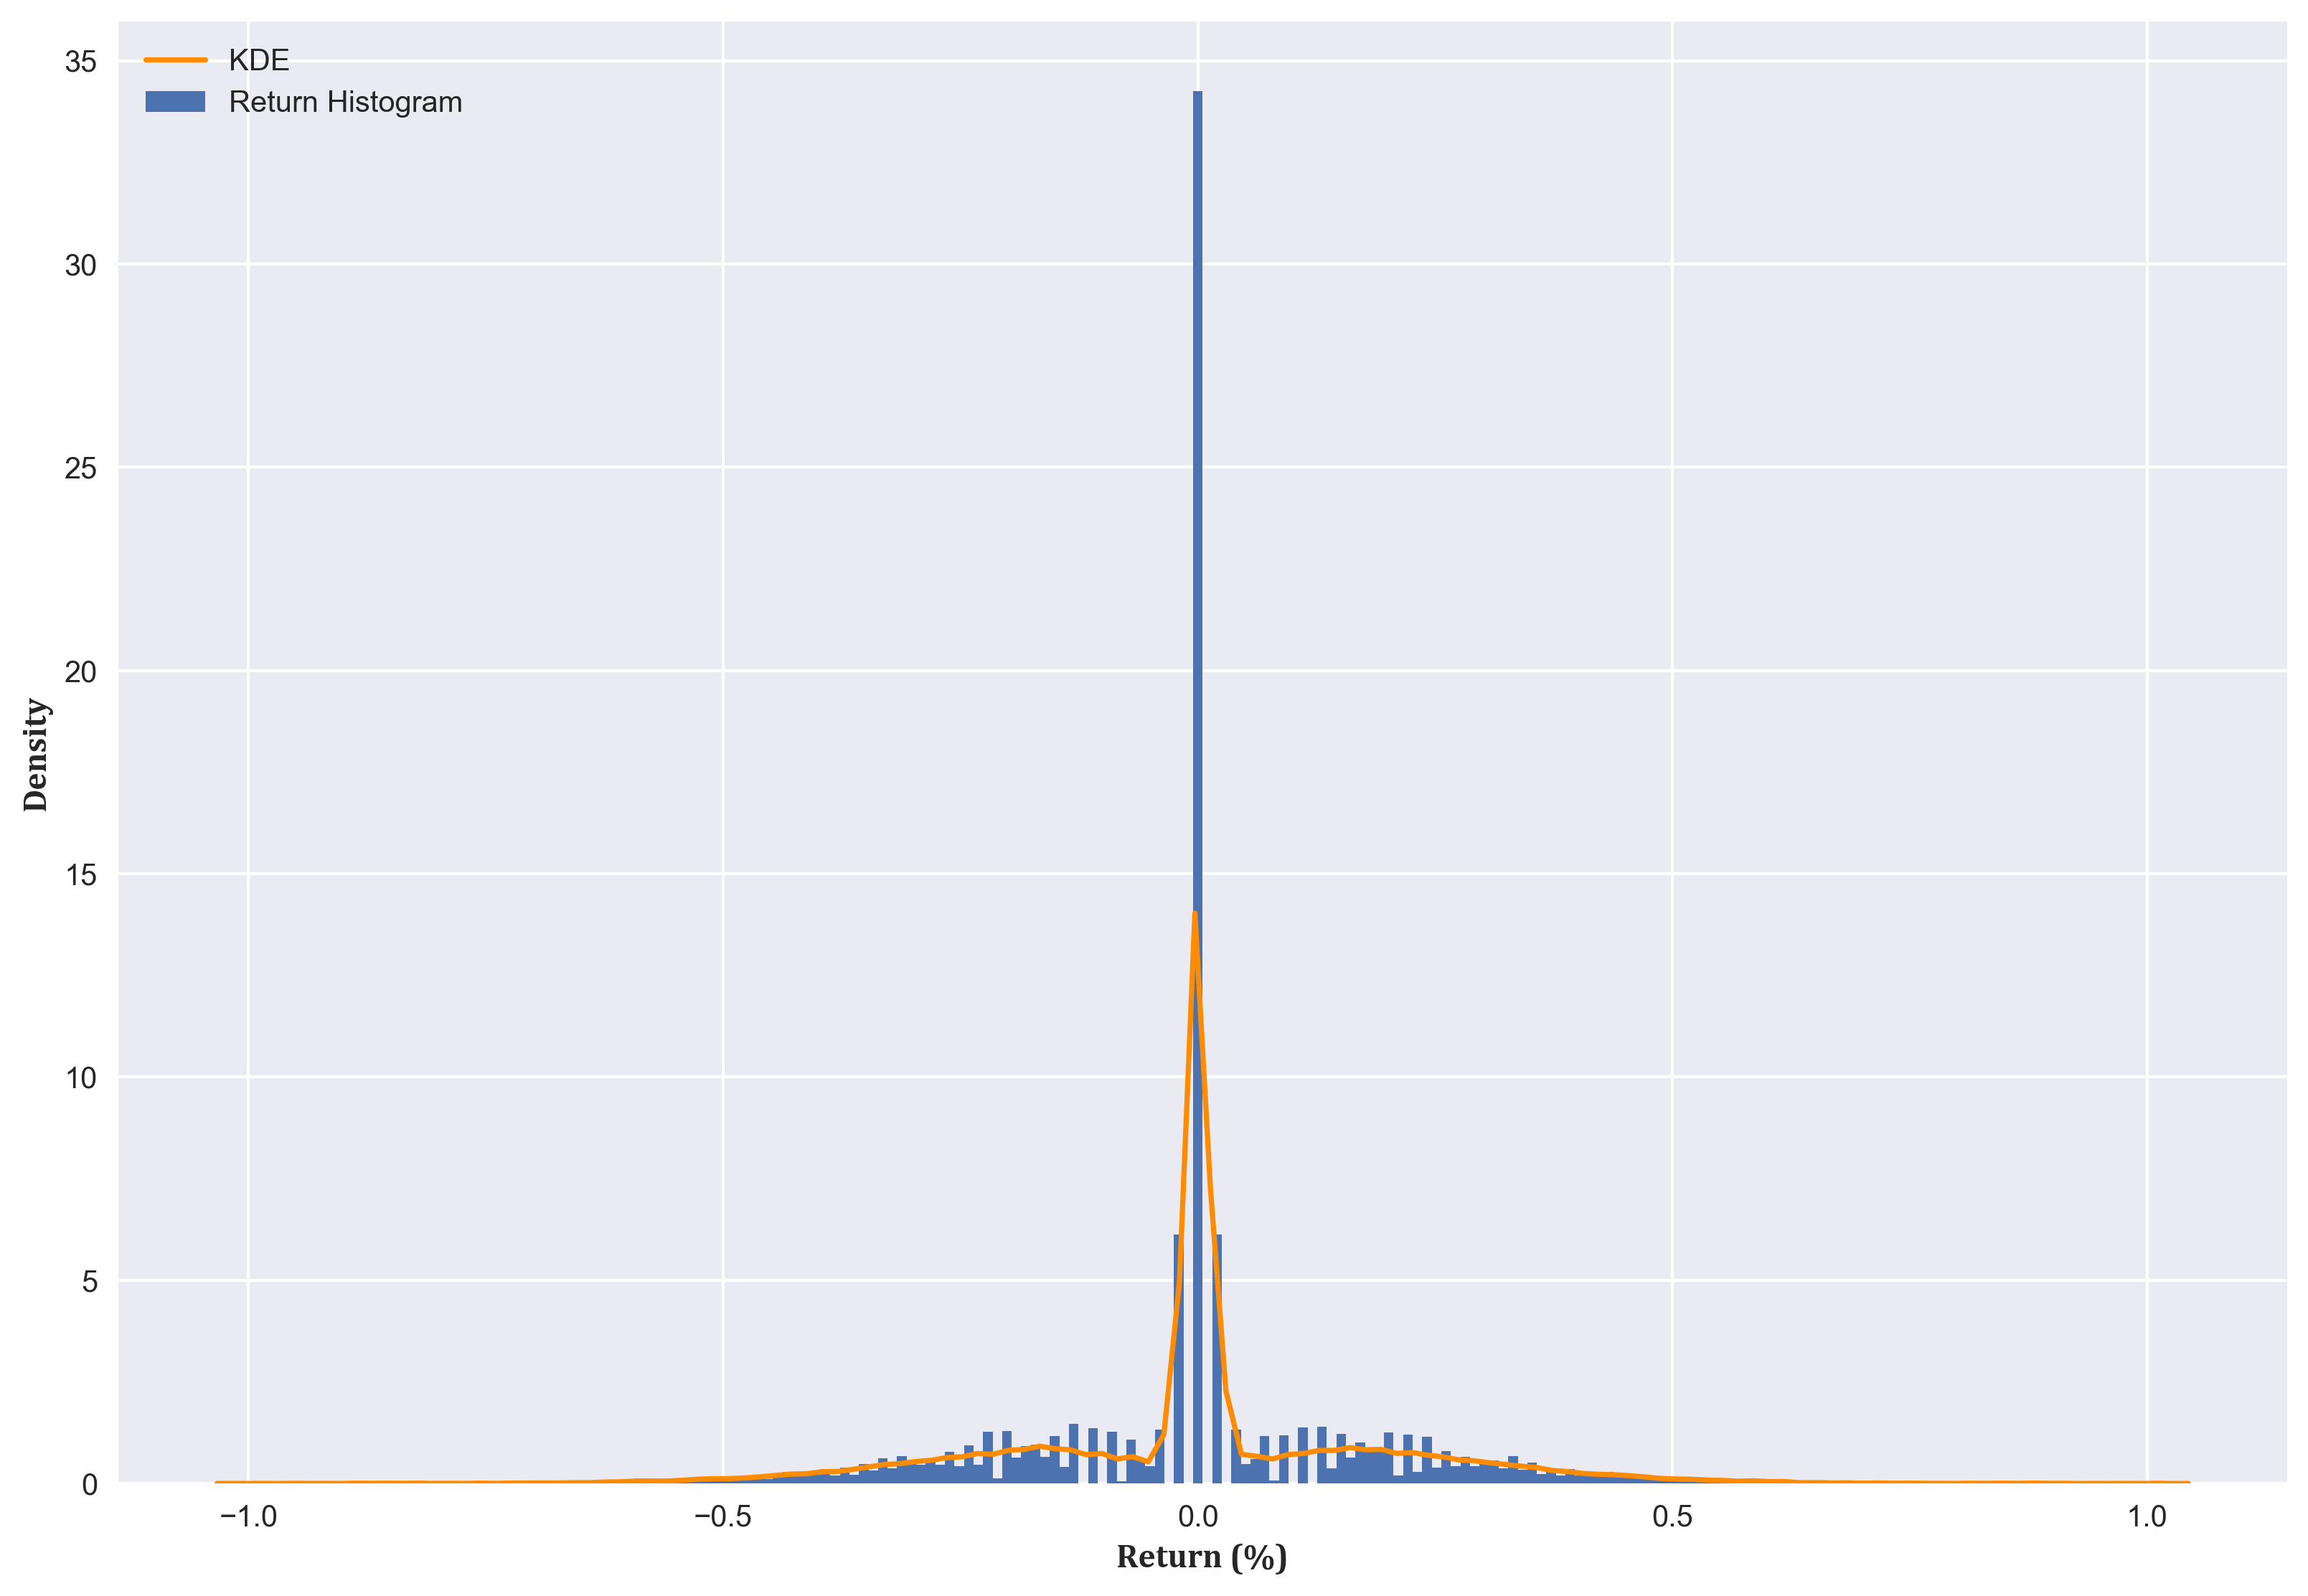

In [23]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.hist(indf.ret1[1:], bins=200, normed=True, label='Return Histogram')
sns.kdeplot(indf.ret1[1:], ax=ax1, linestyle='solid', marker='None', color='DarkOrange', label='KDE')
ax1.set_xlabel('Return (%)', family='Cambria')
ax1.set_ylabel('Density', family='Cambria')
ax1.legend(loc='upper left')
fig.savefig('%sretdist.png' % chartdir)
plt.show()

## Take last price observation of each MCS

In [71]:
last_price = pd.DataFrame(indf.groupby('timestamp').price.last())
last_price = last_price.assign(ret = 100*last_price.price.pct_change())
last_price = last_price.assign(abs_ret = np.abs(last_price.ret))
last_price

,price,ret,abs_ret
timestamp,,,
10,1000769,NaN,NaN
20,1000768,-0.0001,0.0001
28,1000768,0.0000,0.0000
30,1000769,0.0001,0.0001
40,1000767,-0.0002,0.0002
...,...,...,...
99988,1000831,-0.0004,0.0004
99990,1000835,0.0004,0.0004
99994,1000835,0.0000,0.0000


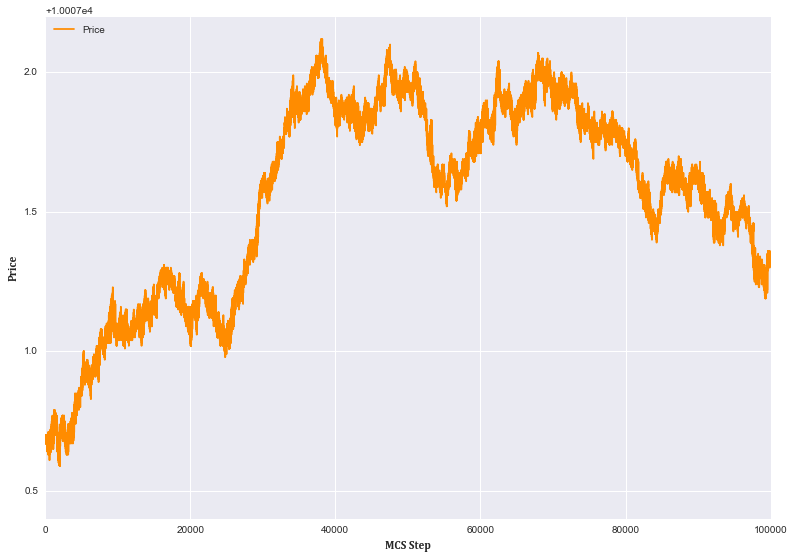

In [72]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.plot(last_price['price']/100, linestyle='solid', color='DarkOrange', marker='None', label='Price')
ax1.set_xlabel('MCS Step', family='Cambria')
ax1.set_ylabel('Price', family='Cambria')
ax1.legend(loc='upper left')
fig.savefig('%sret_eoi.png' % chartdir)
plt.show()

### Autocorrelation

In [73]:
lags = []
autocorr = []
abs_autocorr = []
for i in range(1,51):
    ac = last_price.ret.autocorr(lag = i)
    aac = last_price.abs_ret.autocorr(lag = i)
    lags.append(i)
    autocorr.append(ac)
    abs_autocorr.append(aac)

ar_df = pd.DataFrame({'lag': lags, 'autocorrelation': autocorr, 'autocorrelation_abs': abs_autocorr})
ar_df.set_index('lag', inplace=True)
clustering_constant = ar_df.autocorrelation_abs.sum()/ar_df.autocorrelation.sum()
np.abs(clustering_constant)

7.4291549789808489

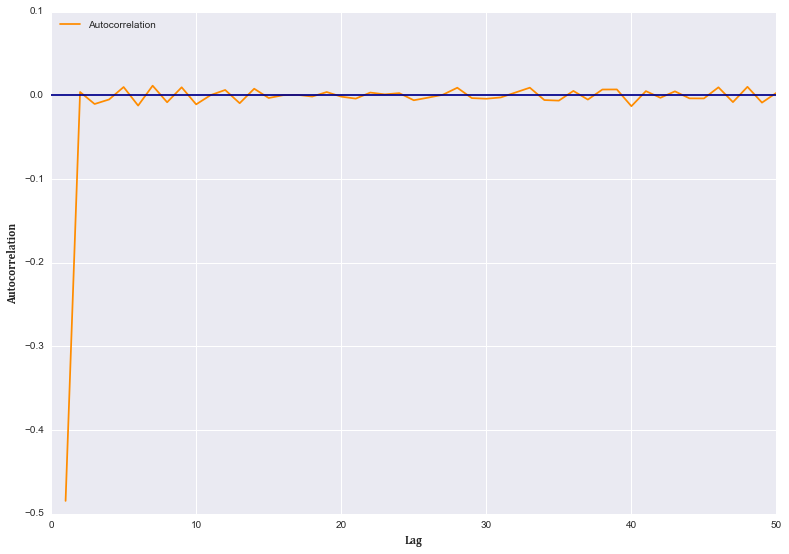

In [74]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.plot(ar_df['autocorrelation'], linestyle='solid', color='DarkOrange', marker='None', label='Autocorrelation')
ax1.axhline(y=0, linestyle='solid', color='DarkBlue', marker='None')
ax1.set_xlabel('Lag', family='Cambria')
ax1.set_ylabel('Autocorrelation', family='Cambria')
ax1.legend(loc='upper left')
plt.show()

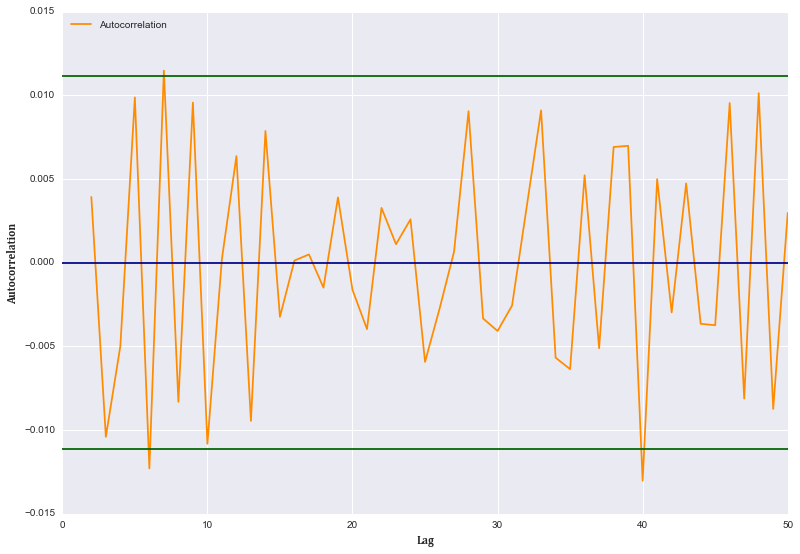

In [75]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.plot(ar_df.loc[2:]['autocorrelation'], linestyle='solid', color='DarkOrange', marker='None', label='Autocorrelation')
ax1.axhline(y=0, linestyle='solid', color='DarkBlue', marker='None')
ax1.axhline(y=2/np.sqrt(last_price.ret.count()), linestyle='solid', color='DarkGreen', marker='None')
ax1.axhline(y=-2/np.sqrt(last_price.ret.count()), linestyle='solid', color='DarkGreen', marker='None')
ax1.set_xlabel('Lag', family='Cambria')
ax1.set_ylabel('Autocorrelation', family='Cambria')
ax1.legend(loc='upper left')
plt.show()

### Return distribution

In [76]:
# pandas reports excess kurtosis (normal == 0)
last_price.ret.mean(), last_price.ret.std(), last_price.ret.kurtosis(), last_price.ret.skew()

(1.9250994381244274e-07,
 0.00035322086328990913,
 0.97216066272271184,
 0.012034316039380533)

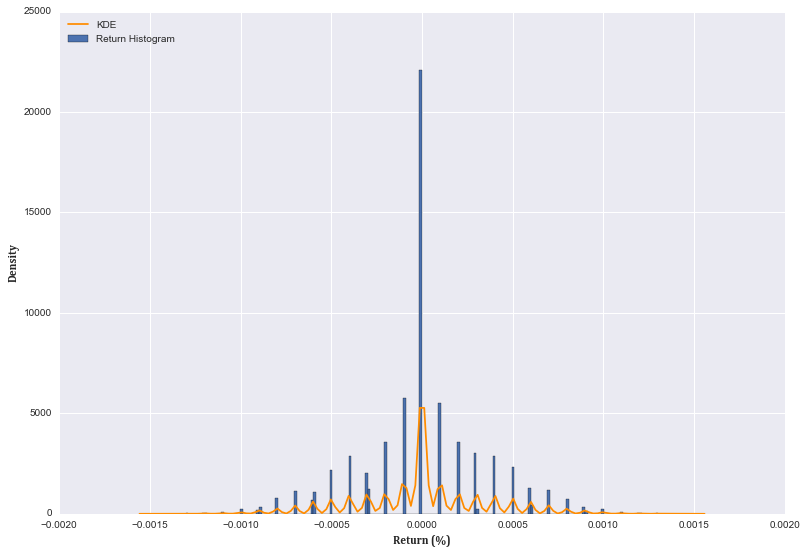

In [77]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.hist(last_price.ret[1:], bins=200, normed=True, label='Return Histogram')
sns.kdeplot(last_price.ret[1:], ax=ax1, linestyle='solid', marker='None', color='DarkOrange', label='KDE')
ax1.set_xlabel('Return (%)', family='Cambria')
ax1.set_ylabel('Density', family='Cambria')
ax1.legend(loc='upper left')
plt.show()